<a href="https://colab.research.google.com/github/jdariasl/ML_2020/blob/labs/Labs/lab1/lab1_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.


In [1]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
#!wget https://raw.githubusercontent.com/jdariasl/ML_2020/labs/Labs/commons/utils/general.py -O general.py
#from general import lab1_parte1
#configure_lab1_parte1()
from lab1 import *


cargando librerias y variables al ambiente


# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple


## Ejercicio 1: Contextualización del problema

El problema de regresión que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [2]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos", x)
print("variable a predecir", y)


conjunto de datos [[   2.6 1360.   150.  ... 1268.    13.6   48.9]
 [   2.  1292.   112.  ...  972.    13.3   47.7]
 [   2.2 1402.    88.  ... 1074.    11.9   54. ]
 ...
 [   2.4 1142.  -200.  ... 1092.    26.9   18.3]
 [   2.1 1003.  -200.  ...  770.    28.3   13.5]
 [   2.2 1071.  -200.  ...  816.    28.5   13.1]]
variable a predecir [0.7578 0.7255 0.7502 ... 0.6406 0.5139 0.5028]


In [3]:
#Ejercicio de Codigo
def num_muestras_carac(X):
    """Esta funcion es encargada retornar el numero de variables
        y caracteristicas del conjunto de datos X

        X: matriz numpy
        retorna:
            numero de muestras (int/float)
            numero de caracteristicas (int/float)
    """
    #- TEST
    return (X.shape[0], X.shape[1])

    #- return (None)

In [4]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1", num_muestras_carac)

TEST EXITOSO!


In [5]:
#@title Pregunta Abierta
#@markdown  ¿que tipo de problema vamos a resolver? justifique su respuesta 
respuesta_1 = "" #@param {type:"string"}

## Ejercicio 2

Analice los siguientes métodos de la teoría  de modelos de  *regresión polinomial múltiple*:

1. error cuadrático medio (<font color='blue'>ECM</font>), 
2. modelo de regresión múltiple (<font color='blue'>regression</font>)
3. potencia del polinomio (<font color='blue'>potenciaPolinomio</font>)
4. gradiente descendente.

Paralos tres primeros métodos, su implementación en código es sugerida en la siguiente celda. Comprenda su funcionamiento y ejecute la celda para definir las funciones y usarlas.


In [6]:
def ECM(Y_est,Y):
    """funcion para calcular el error cuadratico medio
    Y_est: debe contener los valores predichos por el modelo evaluar
    Y: debe contener los valores reales
    """
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

def regression(X, W):
    """calcula la regresión multiple
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    """    
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


Debemos extender nuestro conjunto de datos. Comprende que hace esta la siguiente linea de código y ejecutala. **Muy importante ejecutar SOLA UNA vez esta misma.**

In [7]:
#Aca llamamos la funcion creada anteriormente
# par obtener el numero muestras y caractersiticas
muestras,caracterisitcas = num_muestras_carac(x)
#Extendemos la matriz de X para el parámetro independiente
unos = np.array([np.ones(muestras)])
x = np.concatenate((unos.T, x), axis=1)
x = x.reshape(muestras, caracterisitcas+1)
y = y.reshape(np.size(y), 1)

In [8]:
#@title Pregunta Abierta
#@markdown  ¿por es necesario realizar la anterior extensión a nuestro conjunto de datos?
respuesta_2 = "" #@param {type:"string"}

Ahora proceda a completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

recordar que 

$$ \frac{\partial E(w)}{\partial w_j} = $$

recuerda que debe usar las funciones ya implementadas y no usar **ninguna otra libreria**, adicional a las librerias ya pre-cargadas como numpy (la puedes llamar con np.)

In [9]:
## Ejercicio de codigo
def gradiente_descendente(X, Y, eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje

    retorna: W el valor de de los parametros de regresión polinomica
    """
      
    #Inicializamos el vector de parámetros con ceros
    N,caracterisitcas = num_muestras_carac(X)
    W = np.zeros((1,caracterisitcas))
    W = W.reshape(np.size(W), 1)    

    for iter in range(iteraciones):
        ## Aca debes completar la funcion! recuerda que solo debes usar numpy (np.funcion_a_usar)
        y_est = regression(X,W)
        f_xw_min_yi = y_est - Y
        # puedes apoyarte imprimiendo los shapes
        #print(f_xw_min_yi.shape)
        #print((f_xw_min_yi**2).shape)
        #print(X.T.shape, np.sum(f_xw_min_yi**2, axis = 1, keepdims = True).shape)
        error = np.dot(X.T, (np.sum(f_xw_min_yi**2, axis = 1, keepdims = True)/(2*N)))
        
        ## acutaliza
        W = W-eta*error/N
      
    return W
    

In [10]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio2", gradiente_descendente)

TEST EXITOSO!


## Ejercicio 3: Entrenamiento

Con la función implementada vamos a entrenar un modelo y calcular su error de entrenamiento. Antes de realizar esto, debemos separar nuestro conjunto de datos.



In [11]:
# esto para lograr reproductibilidad
# de nuestro modelo
random.seed(1)
# usamos nuestra funcion para obtener el numero de muestras
N, _ = num_muestras_carac(x)
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]

Ahora entrena ejecutando la siguiente linea de codigo

In [12]:
W = gradiente_descendente(Xtrain, Ytrain, eta = 0.0001, iteraciones=5)

In [13]:
#@title Pregunta Abierta
#@markdown  ¿por qué fue necesario dividir nuestro conjunto de datos? justifique su respuesta 
respuesta_3 = "" #@param {type:"string"}

Vamos a evaluar nuestro modelo calculando el error cuadrático medio. Para ello vamos crear a una función. Recuerda usar las funciones definidas anteriormente.

In [14]:
## Ejercicio de Código
def evaluar_modelo (W, X_to_test, Y_True):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo

    retorna: el error cuadratico medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    y_est = regression(X_to_test,W)
    error = ECM(y_est, Y_True)
    return(error)



In [15]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio3", evaluar_modelo)

TEST EXITOSO!


In [16]:
# y ahora usala para calcular el error, para evaluar el modelo
# completa los parametros
error_train = evaluar_modelo(W, X_to_test = Xtrain,  Y_True = Ytrain)
print("error entrenamiento del modelo", error_train)
error_test = evaluar_modelo(W, X_to_test = Xtest,  Y_True = Ytest)
print("error en la evaluación del modelo", error_test)

error entrenamiento del modelo 725.7622799835661
error en la evaluación del modelo 852.4943844836121


In [17]:
#@title Pregunta Abierta
#@markdown  ¿que conjunto de datos se uso para evaluar el modelo (cual fue el conjunto de datos asignado a X_to_test)? justifica tu respuesta
respuesta_4 = "" #@param {type:"string"}

In [18]:
#@title Pregunta Abierta
#@markdown  escribe aqui tu error al evaluar el modelo con tres cifras decimales. ¿Que tan bueno es tu modelo? Justifica tu respuesta.
respuesta_5 = "" #@param {type:"string"}


Hasta ahora lo que hemos realizado es un regresión lineal no polinómica. Nuestro siguiente objetivo es tomar esta regresión y transformarla en polinómica. Comprenda el funcionamiento de la función propuesta

In [19]:
#Potencia de polinomio
def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las caractersiticas
    grado: esl grado para realizar la potencia al polinomio
    """
    X2 = X.copy()
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

ahora debemos usar esta función para completar la siguiente, recuerda que puedes reusar funciones desarrolladas anteriomente

In [20]:
## Ejercicio de codigo
def gradiente_descendente_poly (X, Y, eta, iteraciones, grado):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje

    retorna: W el valor de de los parametros de regresión polinomica
    """
    X2 = potenciaPolinomio(X,grado)
    ## completa el codigo
    W = gradiente_descendente(X2, Y, eta, iteraciones)

    return (W)

def evaluar_modelo_poly (W, X_to_test, Y_True, grado):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: grado del polinimio a usar

    retorna: el error cuadratico medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    X2 = potenciaPolinomio(X_to_test,grado)
    error = evaluar_modelo (W, X2, Y_True)
    return(error)



In [21]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio4", gradiente_descendente_poly)
GRADER_LAB_1_P1.run_test("ejercicio5", evaluar_modelo_poly)

TEST EXITOSO!
TEST EXITOSO!


In [22]:
# entrenamos
W = gradiente_descendente_poly(Xtrain, Ytrain, eta = 0.0001, iteraciones=2, grado = 2)

In [23]:
# completa los parametros para evaluar el modelo
error_test = evaluar_modelo_poly(W, X_to_test = Xtest,  Y_True = Ytest, grado = 2)
print("error en la evaluación del modelo", error_test)

error en la evaluación del modelo 8.147530153657835e+35


## Ejercicio 4: Experimentar

En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y rangos de polinimios. Vamos a dejar por ahora un numero de iteraciones fijas = 5. Para ello completa la sieguiente función.



In [24]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 10

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:
            W = gradiente_descendente_poly(Xtrain, Ytrain, eta = eta, iteraciones=numero_iter, grado = grado)

            error = evaluar_modelo_poly(W, X_to_test = Xtest,  Y_True = Ytest, grado = grado)
        
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'ecm'] = error
            idx = idx+1

    return (resultados)

In [25]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio6", experimentar)


TEST EXITOSO!


In [26]:
tasas_aprendizaje = [1e-6, 1e-5, 1e-3, 1e-2]
grados_polinomio = [1,2,3]
resultados_ex1 = experimentar(Xtrain, Xtest, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)

In [27]:
#para ver los resultados
resultados_ex1

,grado,tasa de aprendizaje,ecm
0,1.0,0.000001,886.286789
1,2.0,0.000001,NaN
2,3.0,0.000001,NaN
3,1.0,0.000010,888.672718
4,2.0,0.000010,NaN
5,3.0,0.000010,NaN
6,1.0,0.001000,NaN
7,2.0,0.001000,NaN
8,3.0,0.001000,NaN
9,1.0,0.010000,NaN


Si has implementado todo correctamente, parecieria que nuestros entrenamientos no esta logrando buenos resultados (hasta parece haber errores infinitos! o no determinados!). Ahora Entiende la siguiente función. 


In [28]:
#Normalizamos los datos
def normalizar(Xtrain, Xtest):
    """ función que se usa para normalizar los datos con
    un metodo especifico
    Xtrain: matriz de datos entrenamiento a normalizar
    Xtest: matriz de datos evaluación a normalizar
    retorna: matrices normalizadas
    """
    
    media = np.mean(Xtrain, axis = 0)
    desvia = np.std(Xtrain, axis = 0)
    Xtrain_n = stats.stats.zscore(Xtrain)
    Xtest_n = (Xtest - media )/desvia
    # si hay una desviacion por cero, reemplazamos los nan
    Xtrain_n = np.nan_to_num(Xtrain_n)
    Xtest_n = np.nan_to_num(Xtest_n)
    return (Xtrain_n, Xtest_n)

Ahora vuelve a realizar los mismos experimentos pero esta vez usa los valores de salida, de la función anterior.

In [29]:
Xtrain_n, Xtest_n = normalizar(Xtrain, Xtest)

In [30]:
resultados_ex2 = experimentar(Xtrain_n, Xtest_n, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)


In [31]:
#para ver los resultados
resultados_ex2

,grado,tasa de aprendizaje,ecm
0,1.0,0.000001,891.197713
1,2.0,0.000001,891.173416
2,3.0,0.000001,890.654223
3,1.0,0.000010,891.186120
4,2.0,0.000010,890.943196
5,3.0,0.000010,885.772153
6,1.0,0.001000,889.912222
7,2.0,0.001000,866.122325
8,3.0,0.001000,516.048692
9,1.0,0.010000,878.451640


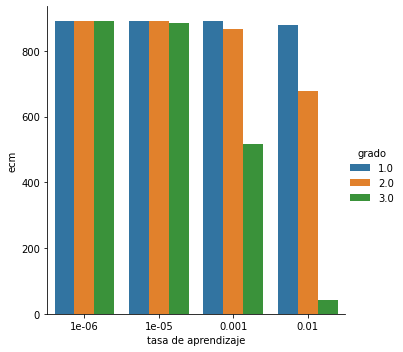

In [32]:
# ejecuta esta linea de codigo para ver raficamente tus resultados
# aca usamos una libreria llamada seaborn
import seaborn as sns
sns.catplot(data = resultados_ex2, x = 'tasa de aprendizaje',
            y = 'ecm',hue ='grado', kind = 'bar')

Ten en cuenta el resutaldo de los  dos experimentos y  responde la  siguiente pregunta abierta

In [33]:
#@title Pregunta Abierta
#@markdown  ¿Qué proceso hace la normalización sobre los datos? Consulte por qué es necesaria la normalización en el modelo de regresión y cuáles son los tipos de normalización más comunes. ¿Cuál de ellos se aplicó en el laboratorio?
respuesta_5 = "" #@param {type:"string"}

Finalmente, en nuestro tercer experimento, vamos ver el efecto de las iteraciones sobre el error. completa la siguiente función. Esta vez el grado y la tasa de aprendizaje es constante

In [34]:
## ejercicio de codigo
def experimentar_2 (Xtrain, Xtest, Ytrain, Ytest, iteraciones, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    rangos: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    eta = 1e-2
    resultados = pd.DataFrame()
    idx = 0 # indice
    for iter in iteraciones:
        for grado in grados:
            W = gradiente_descendente_poly(Xtrain, Ytrain, eta = eta, iteraciones=iter, grado = grado)

            error = evaluar_modelo_poly(W, X_to_test = Xtest,  Y_True = Ytest, grado = grado)
        
            resultados.loc[idx,'iteraciones'] = iter
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'ecm'] = error
            idx = idx+1
    return (resultados)

In [37]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio7", experimentar_2)

cargando librerias y variables al ambiente
TEST EXITOSO!


In [38]:
num_iters = [1,5,10,20,50, 100,200]
grados_polinomio = [1,2]
# usamos la funcion para evaliar los resultados
resultados_ex3 = experimentar_2(Xtrain_n, Xtest_n, Ytrain, Ytest, num_iters, grados_polinomio )


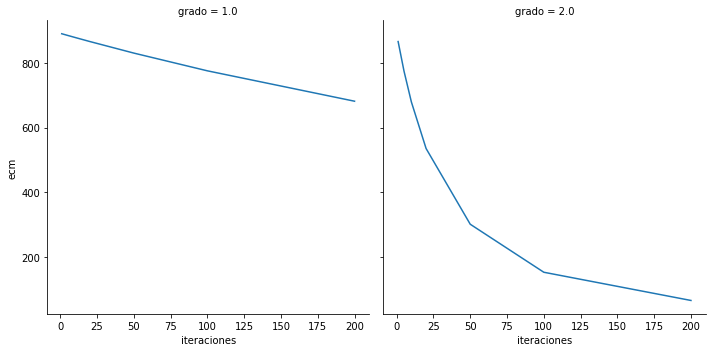

In [40]:
# ejecuta esta linea de codigo para ver raficamente tus resultados
# aca usamos una libreria llamada seaborn
import seaborn as sns
sns.relplot(data = resultados_ex3, x = 'iteraciones',
            y = 'ecm',col ='grado', kind = 'line')

In [297]:
#@title Pregunta Abierta
#@markdown  ¿con base a los resultados anteriores, qué efecto tiene el numero de iteraciones en el error?
respuesta_6 = "" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿que efecto tiene el grado del polinomio en el ECM?
respuesta_7 = "" #@param {type:"string"}

In [298]:
#@title Integrantes
integrante_1 = '' #@param {type:"string"}
codigo_integrante_1 ='' #@param {type:"string"}
integrante_2 = '' #@param {type:"string"}
codigo_integrante_2 = ''  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo del los profesores


In [ ]:
GRADER_LAB1_PARTE1.grade()